In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install yfinance

In [3]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
start = "2010-01-01"
end = "2023-12-31"

In [5]:
arm_df = yf.download("ARM", start = start, end = end, progress = False) # raw data
arm_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-14,56.099998,66.279999,55.540001,63.590000,63.590000,130534500
2023-09-15,68.629997,69.000000,60.750000,60.750000,60.750000,74568900
2023-09-18,57.950001,58.741001,55.020000,58.000000,58.000000,34571900
2023-09-19,56.250000,56.779999,53.880001,55.169998,55.169998,18308600
2023-09-20,55.169998,55.400002,51.520000,52.910000,52.910000,16369500


In [6]:
arm_df.shape

(75, 6)

In [7]:
arm_df.index

DatetimeIndex(['2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19',
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
               '2023-10-06', '2023-10-09', '2023-10-10', '2023-10-11',
               '2023-10-12', '2023-10-13', '2023-10-16', '2023-10-17',
               '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-23',
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10', '2023-11-13', '2023-11-14',
               '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-20',
               '2023-11-21', '2023-11-22', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
      

In [8]:
type(arm_df)

pandas.core.frame.DataFrame

In [9]:
stock = arm_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-14,56.099998,66.279999,55.540001,63.590000,63.590000,130534500
2023-09-15,68.629997,69.000000,60.750000,60.750000,60.750000,74568900
2023-09-18,57.950001,58.741001,55.020000,58.000000,58.000000,34571900
2023-09-19,56.250000,56.779999,53.880001,55.169998,55.169998,18308600
2023-09-20,55.169998,55.400002,51.520000,52.910000,52.910000,16369500


In [10]:
stock.shape

(75, 6)

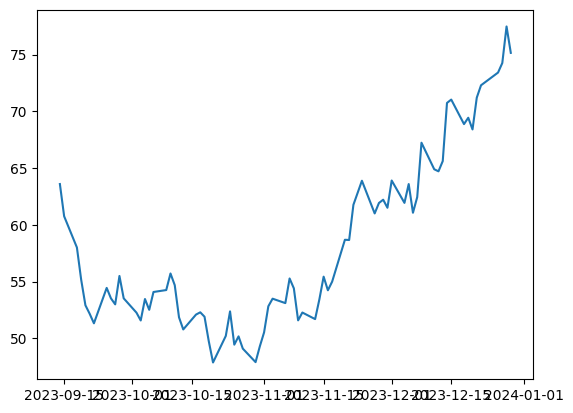

In [11]:
# plot 

plt.plot(stock['Adj Close'])

In [12]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2023-09-14,56.099998,66.279999,55.540001,63.590000,63.590000,130534500,NaN
2023-09-15,68.629997,69.000000,60.750000,60.750000,60.750000,74568900,-0.045689
2023-09-18,57.950001,58.741001,55.020000,58.000000,58.000000,34571900,-0.046324
2023-09-19,56.250000,56.779999,53.880001,55.169998,55.169998,18308600,-0.050024
2023-09-20,55.169998,55.400002,51.520000,52.910000,52.910000,16369500,-0.041827


In [13]:
stock.shape

(75, 7)

In [14]:
stock.dropna(inplace = True)

In [15]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2023-09-15,68.629997,69.000000,60.750000,60.750000,60.750000,74568900,-0.045689
2023-09-18,57.950001,58.741001,55.020000,58.000000,58.000000,34571900,-0.046324
2023-09-19,56.250000,56.779999,53.880001,55.169998,55.169998,18308600,-0.050024
2023-09-20,55.169998,55.400002,51.520000,52.910000,52.910000,16369500,-0.041827
2023-09-21,51.779999,52.799999,49.849998,52.160000,52.160000,14980700,-0.014276


In [16]:
stock.shape

(74, 7)

In [17]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2023-09-15,68.629997,69.000000,60.750000,60.750000,60.750000,74568900,-0.045689,NaN
2023-09-18,57.950001,58.741001,55.020000,58.000000,58.000000,34571900,-0.046324,NaN
2023-09-19,56.250000,56.779999,53.880001,55.169998,55.169998,18308600,-0.050024,NaN
2023-09-20,55.169998,55.400002,51.520000,52.910000,52.910000,16369500,-0.041827,NaN
2023-09-21,51.779999,52.799999,49.849998,52.160000,52.160000,14980700,-0.014276,-0.039628


In [18]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2023-09-15,68.629997,69.000000,60.750000,60.750000,60.750000,74568900,-0.045689,NaN,NaN
2023-09-18,57.950001,58.741001,55.020000,58.000000,58.000000,34571900,-0.046324,NaN,NaN
2023-09-19,56.250000,56.779999,53.880001,55.169998,55.169998,18308600,-0.050024,NaN,NaN
2023-09-20,55.169998,55.400002,51.520000,52.910000,52.910000,16369500,-0.041827,NaN,NaN
2023-09-21,51.779999,52.799999,49.849998,52.160000,52.160000,14980700,-0.014276,-0.039628,0.014467


In [19]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2023-09-21,51.779999,52.799999,49.849998,52.160000,52.160000,14980700,-0.014276,-0.039628,0.014467
2023-09-22,52.900002,52.900002,50.355000,51.320000,51.320000,8430200,-0.016235,-0.033737,0.017133
2023-09-25,51.119999,54.500000,50.020000,54.439999,54.439999,12896500,0.059019,-0.012669,0.043012
2023-09-26,53.930000,54.529999,52.700001,53.520000,53.520000,6283500,-0.017044,-0.006073,0.038099
2023-09-27,54.400002,54.410000,51.789001,52.990002,52.990002,6866700,-0.009952,0.000302,0.032938


In [20]:
stock.shape

(70, 9)

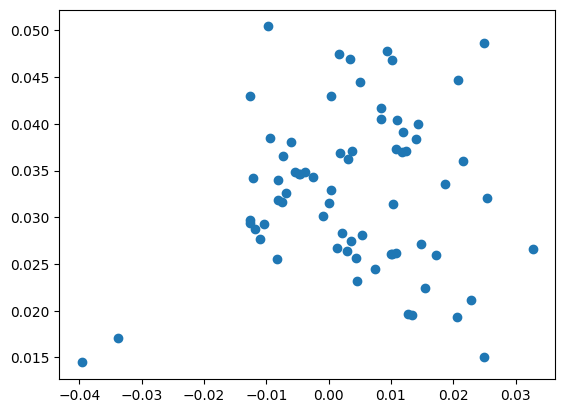

In [21]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [22]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2023-09-21   -0.039628
2023-09-22   -0.033737
2023-09-25   -0.012669
2023-09-26   -0.006073
2023-09-27    0.000302
                ...   
2023-12-22    0.003517
2023-12-26    0.012768
2023-12-27    0.013424
2023-12-28    0.024904
2023-12-29    0.010785
Name: Rets Mean, Length: 70, dtype: float64

In [23]:
type(X1)

pandas.core.series.Series

In [24]:
X2 = stock['Rets STD']
X2

Date
2023-09-21    0.014467
2023-09-22    0.017133
2023-09-25    0.043012
2023-09-26    0.038099
2023-09-27    0.032938
                ...   
2023-12-22    0.027483
2023-12-26    0.019689
2023-12-27    0.019549
2023-12-28    0.015063
2023-12-29    0.026200
Name: Rets STD, Length: 70, dtype: float64

In [25]:
type(X2)

pandas.core.series.Series

In [26]:
X1 = stock['Rets Mean'].values
X1

array([-3.96280626e-02, -3.37373097e-02, -1.26687716e-02, -6.07277394e-03,
        3.02178830e-04,  1.23773880e-02,  8.39497811e-03, -8.17358492e-03,
       -7.42306445e-03,  1.76608908e-03, -1.10398518e-02,  2.08180824e-03,
        7.47435289e-03,  1.54439091e-02,  4.51286477e-03, -2.52973809e-03,
       -1.25923827e-02, -8.12599955e-03, -1.26708964e-02, -1.04358396e-02,
       -8.30908663e-03, -1.18027142e-02, -7.35176057e-03,  3.05744437e-04,
       -9.71180684e-03,  1.72154598e-03,  5.03327402e-03, -9.41973111e-03,
       -1.21225297e-02,  4.32190423e-03,  1.02945398e-02,  1.71678801e-02,
        2.06122726e-02,  2.29018070e-02,  1.47989751e-02, -4.75117303e-03,
       -4.61443009e-03, -5.38251737e-03, -6.77157649e-03,  3.75135741e-03,
        1.00200433e-02,  1.01457559e-02,  2.53669292e-02,  1.86771339e-02,
        2.16269819e-02,  3.27544175e-02,  2.07444966e-02,  1.07488482e-02,
        1.17515366e-02, -8.43740745e-04,  6.26090390e-05,  3.02617114e-03,
        5.32260559e-03, -

In [27]:
X2 = stock['Rets STD'].values
X2

array([0.01446706, 0.017133  , 0.04301156, 0.03809918, 0.03293812,
       0.0370658 , 0.04168982, 0.03183905, 0.03162117, 0.03693237,
       0.02765194, 0.0283176 , 0.02445478, 0.02240259, 0.02318924,
       0.03436385, 0.02970494, 0.03402612, 0.0294446 , 0.02929996,
       0.02557408, 0.0287161 , 0.03658445, 0.04296175, 0.05042433,
       0.04752637, 0.04452047, 0.0385221 , 0.03423779, 0.02560781,
       0.03143958, 0.02595814, 0.01933909, 0.02111784, 0.02718214,
       0.03460137, 0.03468835, 0.0348055 , 0.03260808, 0.03711732,
       0.02609942, 0.0261206 , 0.032094  , 0.03353096, 0.03607081,
       0.02664043, 0.04468209, 0.03730225, 0.03699576, 0.03017205,
       0.03150946, 0.02635346, 0.02809696, 0.03484337, 0.03622008,
       0.04683788, 0.04777477, 0.04693812, 0.03994718, 0.04863611,
       0.04038289, 0.03910785, 0.03838273, 0.0405278 , 0.0267441 ,
       0.02748293, 0.01968937, 0.01954906, 0.01506297, 0.02620012])

In [28]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [29]:
X = np.array(list(zip(X1, X2)))
X

array([[-3.96280626e-02,  1.44670552e-02],
       [-3.37373097e-02,  1.71329998e-02],
       [-1.26687716e-02,  4.30115622e-02],
       [-6.07277394e-03,  3.80991809e-02],
       [ 3.02178830e-04,  3.29381223e-02],
       [ 1.23773880e-02,  3.70658012e-02],
       [ 8.39497811e-03,  4.16898188e-02],
       [-8.17358492e-03,  3.18390475e-02],
       [-7.42306445e-03,  3.16211684e-02],
       [ 1.76608908e-03,  3.69323708e-02],
       [-1.10398518e-02,  2.76519370e-02],
       [ 2.08180824e-03,  2.83176033e-02],
       [ 7.47435289e-03,  2.44547772e-02],
       [ 1.54439091e-02,  2.24025921e-02],
       [ 4.51286477e-03,  2.31892445e-02],
       [-2.52973809e-03,  3.43638548e-02],
       [-1.25923827e-02,  2.97049374e-02],
       [-8.12599955e-03,  3.40261204e-02],
       [-1.26708964e-02,  2.94446020e-02],
       [-1.04358396e-02,  2.92999642e-02],
       [-8.30908663e-03,  2.55740835e-02],
       [-1.18027142e-02,  2.87161048e-02],
       [-7.35176057e-03,  3.65844550e-02],
       [ 3.

In [30]:
type(X)

numpy.ndarray

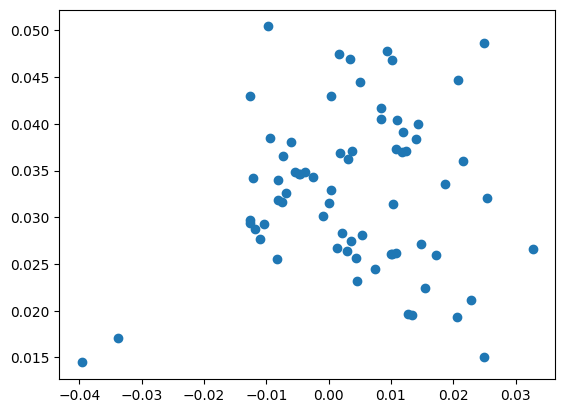

In [31]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [32]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [33]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[-3.33185458, -2.19705706],
       [-2.87766214, -1.87636063],
       [-1.25322282,  1.23666827],
       [-0.74465417,  0.64573958],
       [-0.25312866,  0.02489657],
       [ 0.6779015 ,  0.52143048],
       [ 0.3708473 ,  1.07767083],
       [-0.90663219, -0.10731524],
       [-0.8487651 , -0.13352473],
       [-0.14025736,  0.50537964],
       [-1.12762885, -0.6109984 ],
       [-0.11591459, -0.53092292],
       [ 0.29986469, -0.99559669],
       [ 0.91433829, -1.2424617 ],
       [ 0.07152622, -1.14783234],
       [-0.47147685,  0.19640326],
       [-1.24733304, -0.36403532],
       [-0.90296323,  0.15577592],
       [-1.25338665, -0.39535204],
       [-1.08105793, -0.41275105],
       [-0.91707972, -0.86095115],
       [-1.18644754, -0.48298569],
       [-0.84326738,  0.46352754],
       [-0.25285374,  1.23067594],
       [-1.02523311,  2.12837728],
       [-0.14369175,  1.77977127],
       [ 0.11165113,  1.41818096],
       [-1.00271331,  0.69661456],
       [-1.21110615,

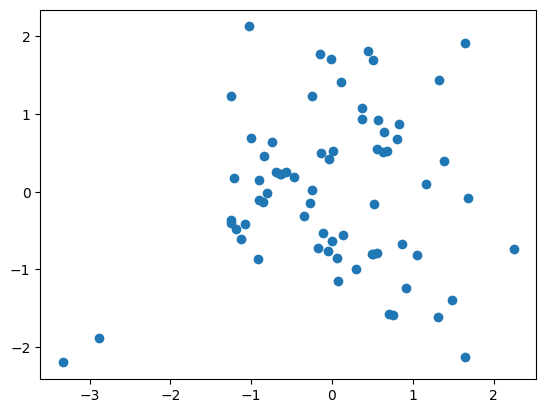

In [34]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);

In [35]:
# start KMean Clustering

# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [36]:
def plotCluster(data, C, K, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i]) # find data for each cluster
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i]) # plot
        plt.annotate(i, (C[i, 0], C[i, 1]), size = 20)
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('Variable #1')
    plt.ylabel('Variable #2')
    plt.title('Cluster')

In [37]:
def kmeanClustering(data, K):

    # step 1. random centroids
    C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
    C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)

    # set Centroid to variable C
    C = np.zeros((K, 2))
    C_old = np.zeros(C.shape)

    C[:, 0] = C_x 
    C[:, 1] = C_y 

    # Step 2. label data
    cluster_label = np.zeros((len(data), 1))

    for i in range(len(data)): # run 150 rounds - depands on length of data
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance) # for the shortest distance
        cluster_label[i] = cluster

    # Step 3. calculate new centroids
    C_old = C.copy()

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

    # Calculate error
    error = distance_fn(C, C_old, None)
    
    # Plot
    plotCluster(data, C, K, cluster_label)

    # Check if error is ok to stop
    while error != 0: # will stop when error = 0
    
        cluster_label = np.zeros((len(data), 1))
    
        for i in range(len(data)):
            distance = distance_fn(data[i, :], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
    
        C_old = C.copy()
    
        for i in range(K):
            points = []
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
            C[i] = np.mean(points, axis=0)
        
        plotCluster(data, C, K, cluster_label.copy())
    
        error = distance_fn(C, C_old, None)
        print(error)

    return cluster_label

1.0916936782236448
0.23145237675987998
0.10937622936116391
0.1785213822614901
0.13947252618594647
0.21098698887975065
0.13978920009931256
0.0


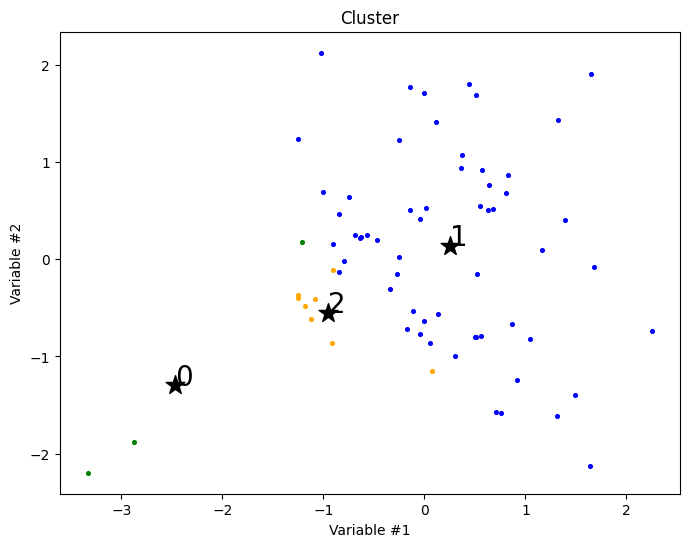

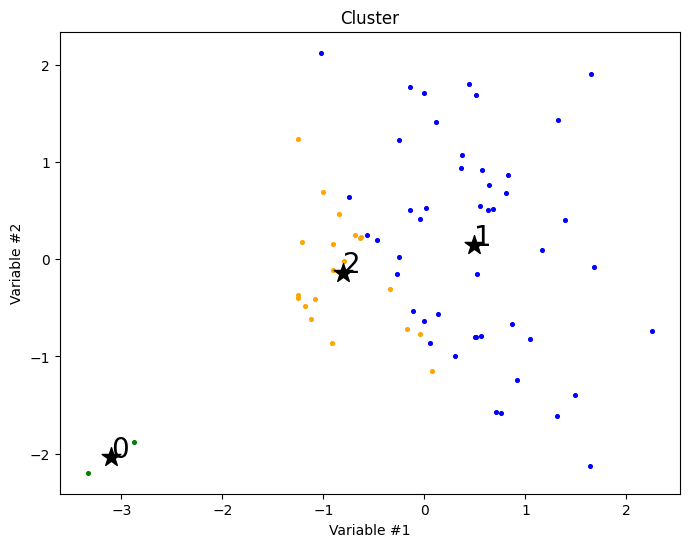

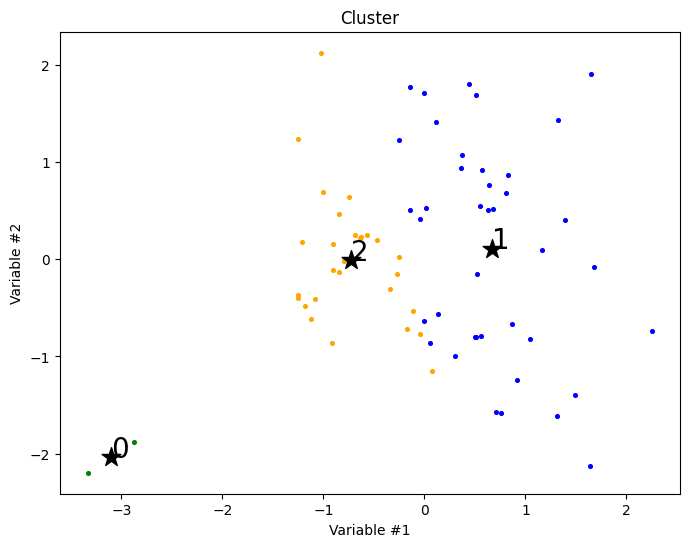

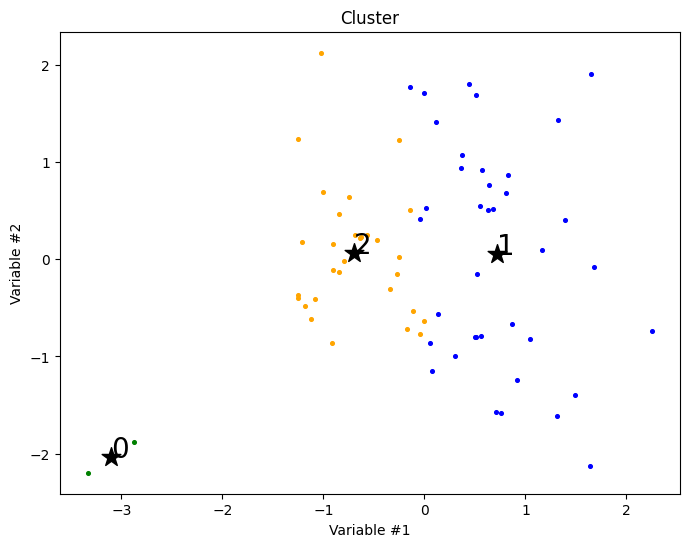

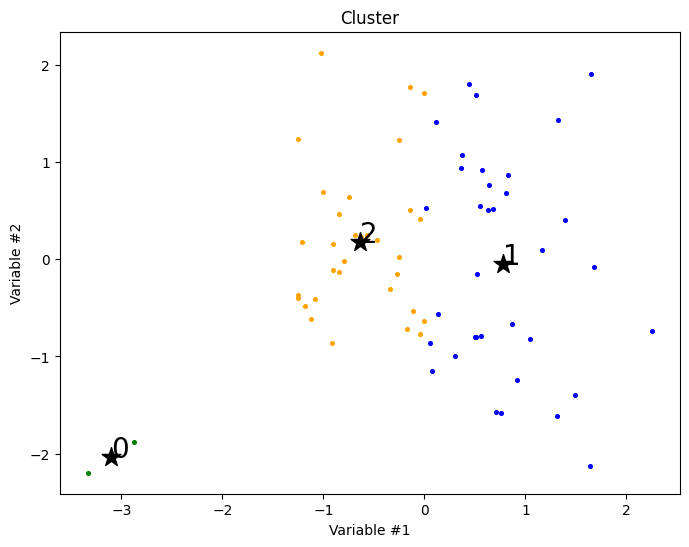

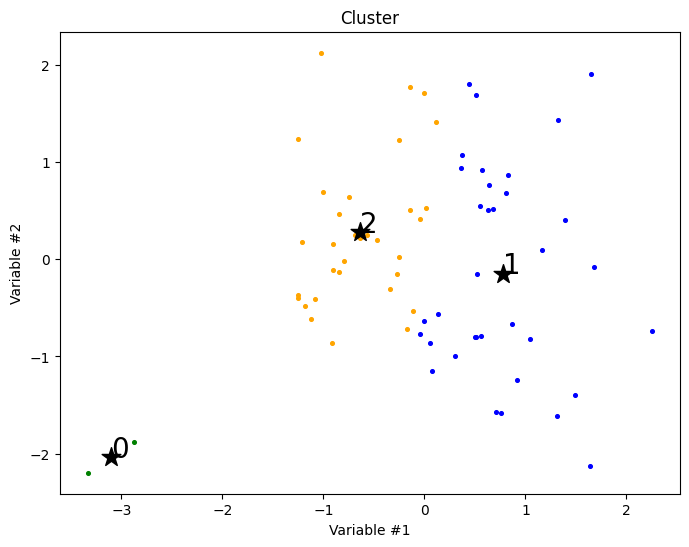

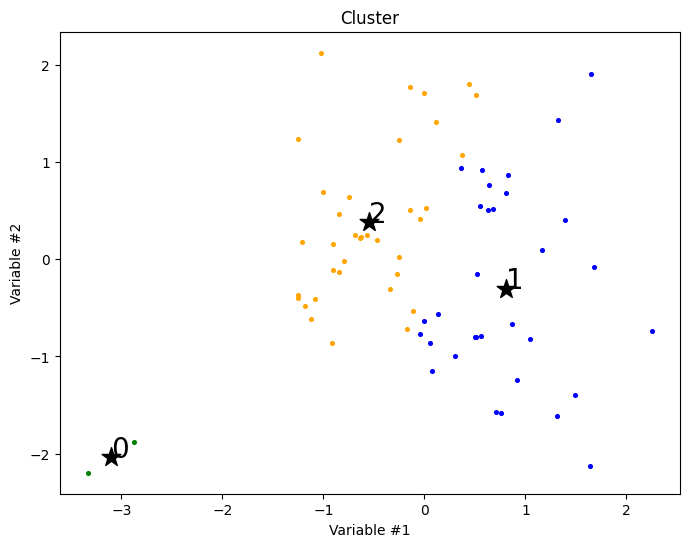

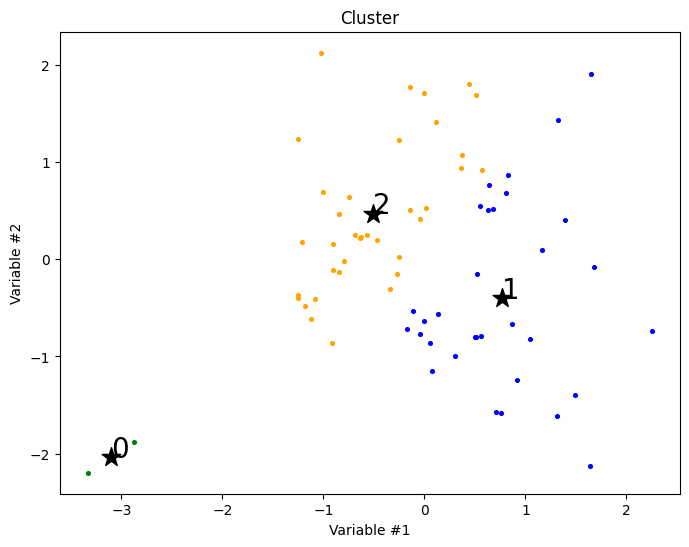

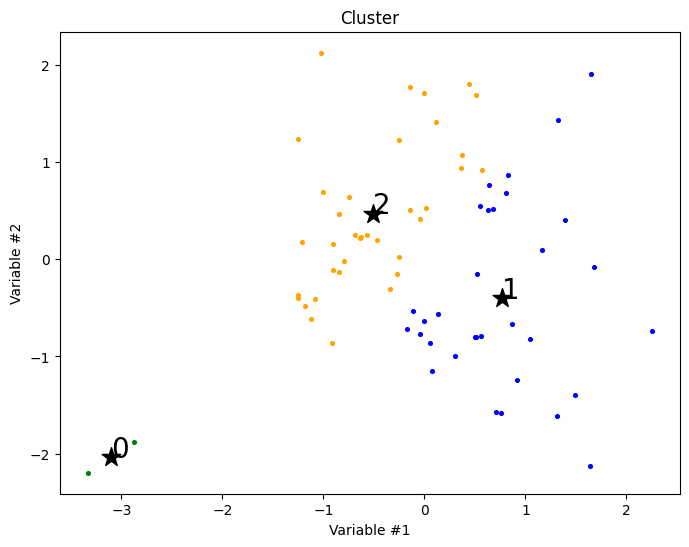

In [38]:
# call a function
K = 3
label_kmean = kmeanClustering(X_norm, K)

In [39]:
label_kmean

array([[0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### Use label from KMean

In [40]:
stock['Class'] = label_kmean 
stock.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2023-09-21,51.779999,52.799999,49.849998,52.160000,52.160000,14980700,-0.014276,-0.039628,0.014467,0.0
2023-09-22,52.900002,52.900002,50.355000,51.320000,51.320000,8430200,-0.016235,-0.033737,0.017133,0.0
2023-09-25,51.119999,54.500000,50.020000,54.439999,54.439999,12896500,0.059019,-0.012669,0.043012,2.0
2023-09-26,53.930000,54.529999,52.700001,53.520000,53.520000,6283500,-0.017044,-0.006073,0.038099,2.0
2023-09-27,54.400002,54.410000,51.789001,52.990002,52.990002,6866700,-0.009952,0.000302,0.032938,2.0
2023-09-28,53.500000,56.500000,52.860001,55.490002,55.490002,8765800,0.046100,0.012377,0.037066,1.0
2023-09-29,56.209999,56.790001,53.080002,53.520000,53.520000,7797500,-0.036147,0.008395,0.041690,2.0
2023-10-02,53.474998,54.189999,51.910000,52.259998,52.259998,8857100,-0.023824,-0.008174,0.031839,2.0
2023-10-03,51.959999,52.235001,50.799999,51.570000,51.570000,4687700,-0.013291,-0.007423,0.031621,2.0


In [41]:
# idea to trade

idx_c0 = np.where(stock['Class'] == 0) # find index in class 0
idx_c0

(array([0, 1]),)

In [42]:
len(idx_c0)

1

In [43]:
len(idx_c0[0])

2

In [44]:
idx_c1 = np.where(stock['Class'] == 1)
idx_c1

(array([ 5, 11, 12, 13, 14, 29, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 45,
        46, 47, 48, 51, 52, 58, 59, 61, 62, 64, 65, 66, 67, 68, 69]),)

In [45]:
len(idx_c1[0])

32

In [46]:
idx_c2 = np.where(stock['Class'] == 2)
idx_c2

(array([ 2,  3,  4,  6,  7,  8,  9, 10, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26, 27, 28, 35, 36, 37, 38, 39, 49, 50, 53, 54, 55, 56, 57,
        60, 63]),)

In [47]:
len(idx_c2[0])

36

In [48]:
len(stock), len(idx_c0[0]) + len(idx_c1[0]) + len(idx_c2[0])

(70, 70)

In [49]:
# if we would like to trade only some class

profit_c0 = stock['Log Rets']
profit_c0

Date
2023-09-21   -0.014276
2023-09-22   -0.016235
2023-09-25    0.059019
2023-09-26   -0.017044
2023-09-27   -0.009952
                ...   
2023-12-22    0.015193
2023-12-26    0.015374
2023-12-27    0.011378
2023-12-28    0.042453
2023-12-29   -0.030471
Name: Log Rets, Length: 70, dtype: float64

In [50]:
type(profit_c0)

pandas.core.series.Series

In [51]:
profit_c0 = np.array(profit_c0).reshape(-1, 1)
profit_c0

array([[-0.01427644],
       [-0.01623538],
       [ 0.05901862],
       [-0.01704373],
       [-0.00995218],
       [ 0.04609961],
       [-0.03614743],
       [-0.0238242 ],
       [-0.01329113],
       [ 0.03599359],
       [-0.0179301 ],
       [ 0.02946087],
       [ 0.00313853],
       [ 0.02655666],
       [-0.01866163],
       [-0.05314311],
       [-0.02085235],
       [ 0.02547044],
       [ 0.00383217],
       [-0.00748635],
       [-0.04250935],
       [-0.03832049],
       [ 0.04772521],
       [ 0.0421197 ],
       [-0.0575741 ],
       [ 0.01465742],
       [-0.02176185],
       [-0.02453981],
       [ 0.0286057 ],
       [ 0.02464807],
       [ 0.04452059],
       [ 0.01260485],
       [-0.00731785],
       [ 0.04005337],
       [-0.01586609],
       [-0.05323015],
       [ 0.01328857],
       [-0.01115829],
       [ 0.03310808],
       [ 0.03674858],
       [-0.02188672],
       [ 0.01391713],
       [ 0.06494758],
       [-0.0003409 ],
       [ 0.05149782],
       [ 0

In [52]:
profit_c0[idx_c1, 0] = 0
profit_c0[idx_c2, 0] = 0
profit_c0

array([[-0.01427644],
       [-0.01623538],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

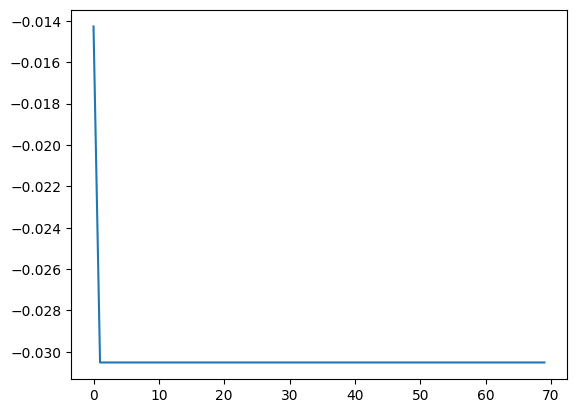

In [53]:
plt.plot(profit_c0.cumsum())

In [54]:
profit_c1 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c1

array([[-0.01427644],
       [-0.01623538],
       [ 0.05901862],
       [-0.01704373],
       [-0.00995218],
       [ 0.04609961],
       [-0.03614743],
       [-0.0238242 ],
       [-0.01329113],
       [ 0.03599359],
       [-0.0179301 ],
       [ 0.02946087],
       [ 0.00313853],
       [ 0.02655666],
       [-0.01866163],
       [-0.05314311],
       [-0.02085235],
       [ 0.02547044],
       [ 0.00383217],
       [-0.00748635],
       [-0.04250935],
       [-0.03832049],
       [ 0.04772521],
       [ 0.0421197 ],
       [-0.0575741 ],
       [ 0.01465742],
       [-0.02176185],
       [-0.02453981],
       [ 0.0286057 ],
       [ 0.02464807],
       [ 0.04452059],
       [ 0.01260485],
       [-0.00731785],
       [ 0.04005337],
       [-0.01586609],
       [-0.05323015],
       [ 0.01328857],
       [-0.01115829],
       [ 0.03310808],
       [ 0.03674858],
       [-0.02188672],
       [ 0.01391713],
       [ 0.06494758],
       [-0.0003409 ],
       [ 0.05149782],
       [ 0

In [55]:
profit_c1[idx_c0, 0] = 0
profit_c1[idx_c2, 0] = 0
profit_c1

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.04609961],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.02946087],
       [ 0.00313853],
       [ 0.02655666],
       [-0.01866163],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.02464807],
       [ 0.04452059],
       [ 0.01260485],
       [-0.00731785],
       [ 0.04005337],
       [-0.01586609],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.02188672],
       [ 0.01391713],
       [ 0.06494758],
       [-0.0003409 ],
       [ 0.05149782],
       [ 0

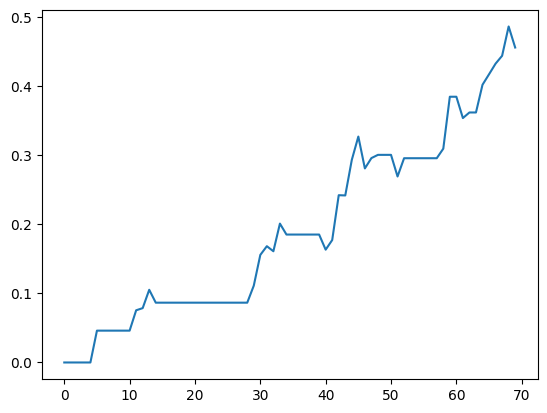

In [56]:
plt.plot(profit_c1.cumsum())

In [57]:
profit_c2 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c2

array([[-0.01427644],
       [-0.01623538],
       [ 0.05901862],
       [-0.01704373],
       [-0.00995218],
       [ 0.04609961],
       [-0.03614743],
       [-0.0238242 ],
       [-0.01329113],
       [ 0.03599359],
       [-0.0179301 ],
       [ 0.02946087],
       [ 0.00313853],
       [ 0.02655666],
       [-0.01866163],
       [-0.05314311],
       [-0.02085235],
       [ 0.02547044],
       [ 0.00383217],
       [-0.00748635],
       [-0.04250935],
       [-0.03832049],
       [ 0.04772521],
       [ 0.0421197 ],
       [-0.0575741 ],
       [ 0.01465742],
       [-0.02176185],
       [-0.02453981],
       [ 0.0286057 ],
       [ 0.02464807],
       [ 0.04452059],
       [ 0.01260485],
       [-0.00731785],
       [ 0.04005337],
       [-0.01586609],
       [-0.05323015],
       [ 0.01328857],
       [-0.01115829],
       [ 0.03310808],
       [ 0.03674858],
       [-0.02188672],
       [ 0.01391713],
       [ 0.06494758],
       [-0.0003409 ],
       [ 0.05149782],
       [ 0

In [58]:
profit_c2[idx_c0, 0] = 0
profit_c2[idx_c1, 0] = 0
profit_c2

array([[ 0.        ],
       [ 0.        ],
       [ 0.05901862],
       [-0.01704373],
       [-0.00995218],
       [ 0.        ],
       [-0.03614743],
       [-0.0238242 ],
       [-0.01329113],
       [ 0.03599359],
       [-0.0179301 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.05314311],
       [-0.02085235],
       [ 0.02547044],
       [ 0.00383217],
       [-0.00748635],
       [-0.04250935],
       [-0.03832049],
       [ 0.04772521],
       [ 0.0421197 ],
       [-0.0575741 ],
       [ 0.01465742],
       [-0.02176185],
       [-0.02453981],
       [ 0.0286057 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.05323015],
       [ 0.01328857],
       [-0.01115829],
       [ 0.03310808],
       [ 0.03674858],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

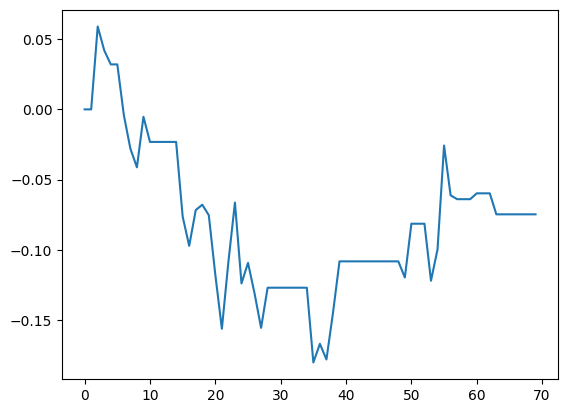

In [59]:
plt.plot(profit_c2.cumsum())

*** Require to select the correct class and time before trade
- What we require to do more
    - Lock ahead bias
    - In sample & Out sample

In [60]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2023-09-21,51.779999,52.799999,49.849998,52.160000,52.160000,14980700,-0.014276,-0.039628,0.014467,0.0
2023-09-22,52.900002,52.900002,50.355000,51.320000,51.320000,8430200,-0.016235,-0.033737,0.017133,0.0
2023-09-25,51.119999,54.500000,50.020000,54.439999,54.439999,12896500,0.059019,-0.012669,0.043012,2.0
2023-09-26,53.930000,54.529999,52.700001,53.520000,53.520000,6283500,-0.017044,-0.006073,0.038099,2.0
2023-09-27,54.400002,54.410000,51.789001,52.990002,52.990002,6866700,-0.009952,0.000302,0.032938,2.0
